In [1]:
# Import modules 
import sys
from os import getcwd
from os.path import dirname
path = dirname(dirname(getcwd()))
sys.path.append(path)
import ale

from MintPy.interpret_toolkit import InterpretToolkit
from MintPy.utils import combine_top_features
import pandas as pd
import numpy as np
import pickle
from joblib import load

In [14]:
#
# LOADING THE MODEL OBJECTS AND THEIR TRAINING EXAMPLES 
#
# Define target feature
TARGET_COLUMN = 'cat_rt'

# Load the model objects. In this case, we are using 3 
# popular models availabe in scikit-learn 
model_fname = ['RandomForest.pkl']
model_objs = [load(fname) for fname in model_fname]

# Load the training dataset 
data  = pd.read_csv('example_data.csv')
targets = data[TARGET_COLUMN].values

# only want to use these columns below
cols_to_use = ['dllwave_flux', 'dwpt2m', 'fric_vel', 'gflux', 'high_cloud',
            'lat_hf', 'low_cloud', 'mid_cloud', 'sat_irbt', 'sens_hf',
            'sfcT_hrs_ab_frez', 'sfcT_hrs_bl_frez', 'sfc_rough', 'sfc_temp',
            'swave_flux','temp2m', 'tmp2m_hrs_ab_frez', 'tmp2m_hrs_bl_frez',
            'tot_cloud', 'uplwav_flux','vbd_flux', 'vdd_flux','wind10m',
            'date_marker', 'urban','rural','d_ground','d_rad_d','d_rad_u',
            'hrrr_dT']

units = ['W m$^{-2}$', '$^\circ$C', 'm s$^{-1}$', 'W m$^{-2}$', '%', 'W m$^{-2}$', '%', '%', 
         '$^\circ$C', 'W m$^{-2}$', 'hrs', 'hrs', 'unitless','$^\circ$C', 'W m$^{-2}$', '$^\circ$C', 
         'hrs', 'hrs', '%', 'W m$^{-2}$', 'W m$^{-2}$', 'W m$^{-2}$', 'm s$^{-1}$', 'days', 'unitless', 
         'unitless', 'W m$^{-2}$', 'W m$^{-2}$', 'W m$^{-2}$', '$^\circ$C']

pretty_names = [r'$\lambda_{\downarrow}$', '$T_{d}$', '$V_{fric}$', 'Gflux', '$Cloud_{high}$',
 '$Lat_{F}$', '$Cloud_{low}$', '$Cloud_{mid}$', 'IRBT', '$Sens_{F}$',
 'Hours $T_{sfc}$ $> $0', 'Hours $T_{sfc}$ $<= $0', 'SfcRough', '$T_{sfc}$',
 '$I_{S}$', '$T_{2m}$', 'Hours $T_{2m}$ $> $0', 'Hours $T_{2m}$ $<= $0',
 '$Cloud_{Tot}$', r'$\lambda_{\uparrow}$', 'VBD', 'VDD', '10m wind',
 'Date marker', 'Urban', 'Rural', 'Diff1', 'Diff2', 'Diff3',
 '$T_{sfc}$ - $T_{2m}$']

feature_units = {c : u for c,u in zip(cols_to_use, units)}
readable_feature_names = {c : u for c,u in zip(cols_to_use, pretty_names)}

# get predictor subset of dataframe (only the predictors used in training the model)
examples = data[cols_to_use]

print(np.max(examples['dwpt2m']))

21.501739501953125


2020-06-01 21:47:40.400 | DEBUG    | ale:_second_order_ale_quant:450 - Quantiles: (array([-3.80955048e+01, -2.02883759e+01, -1.22774963e+01, -1.05727234e+01,
       -9.27322388e+00, -7.28057861e+00, -5.81896973e+00, -3.14135742e+00,
       -2.09335327e+00, -1.14462280e+00,  1.28784180e-02,  1.21527100e+00,
        2.48110962e+00,  5.40649414e+00,  9.44680786e+00,  2.15017395e+01]), array([126.90000153, 167.6000061 , 196.1000061 , 211.3999939 ,
       218.        , 229.8999939 , 234.30000305, 245.3999939 ,
       253.1000061 , 263.20001221, 275.79998779, 285.5       ,
       301.        , 323.3999939 , 337.8999939 , 390.8999939 ])).
2020-06-01 21:47:41.008 | DEBUG    | ale:_ax_quantiles:180 - Quantiles: [-3.80955048e+01 -2.02883759e+01 -1.22774963e+01 -1.05727234e+01
 -9.27322388e+00 -7.28057861e+00 -5.81896973e+00 -3.14135742e+00
 -2.09335327e+00 -1.14462280e+00  1.28784180e-02  1.21527100e+00
  2.48110962e+00  5.40649414e+00  9.44680786e+00  2.15017395e+01].
2020-06-01 21:47:41.027 | 

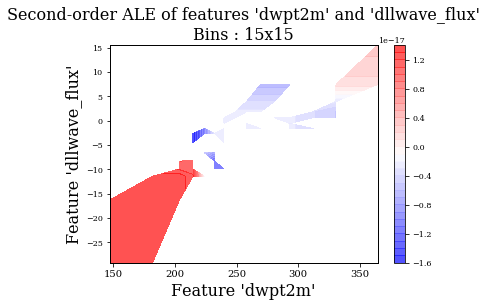

In [11]:
ale.ale_plot(
    model=model_objs[0],
    train_set=examples,
    features=('dwpt2m','dllwave_flux'),
    bins=15,
    rugplot_lim=1000,
)

In [4]:
myInterpreter = InterpretToolkit(model=model_objs, 
                             examples=examples, 
                             targets=targets,
                                )

In [5]:
important_vars = {'RandomForestClassifier': ['dllwave_flux', 'dwpt2m', 'fric_vel', 'gflux', 'high_cloud'], 
 'LogisticRegression': ['dllwave_flux', 'dwpt2m', 'fric_vel', 'gflux', 'high_cloud'], 
 'GradientBoostingClassifier': ['dllwave_flux', 'dwpt2m', 'fric_vel', 'gflux', 'high_cloud']}
important_vars = combine_top_features(important_vars, nvars=5)
print(important_vars)

['high_cloud', 'dwpt2m', 'gflux', 'fric_vel', 'dllwave_flux']


Using 3 processors...
model name : RandomForestClassifier
feature tuple : ('dllwave_flux', 'fric_vel')
model name : RandomForestClassifier
model name : RandomForestClassifier
feature tuple : ('dwpt2m', 'fric_vel')
feature tuple : ('gflux', 'high_cloud')


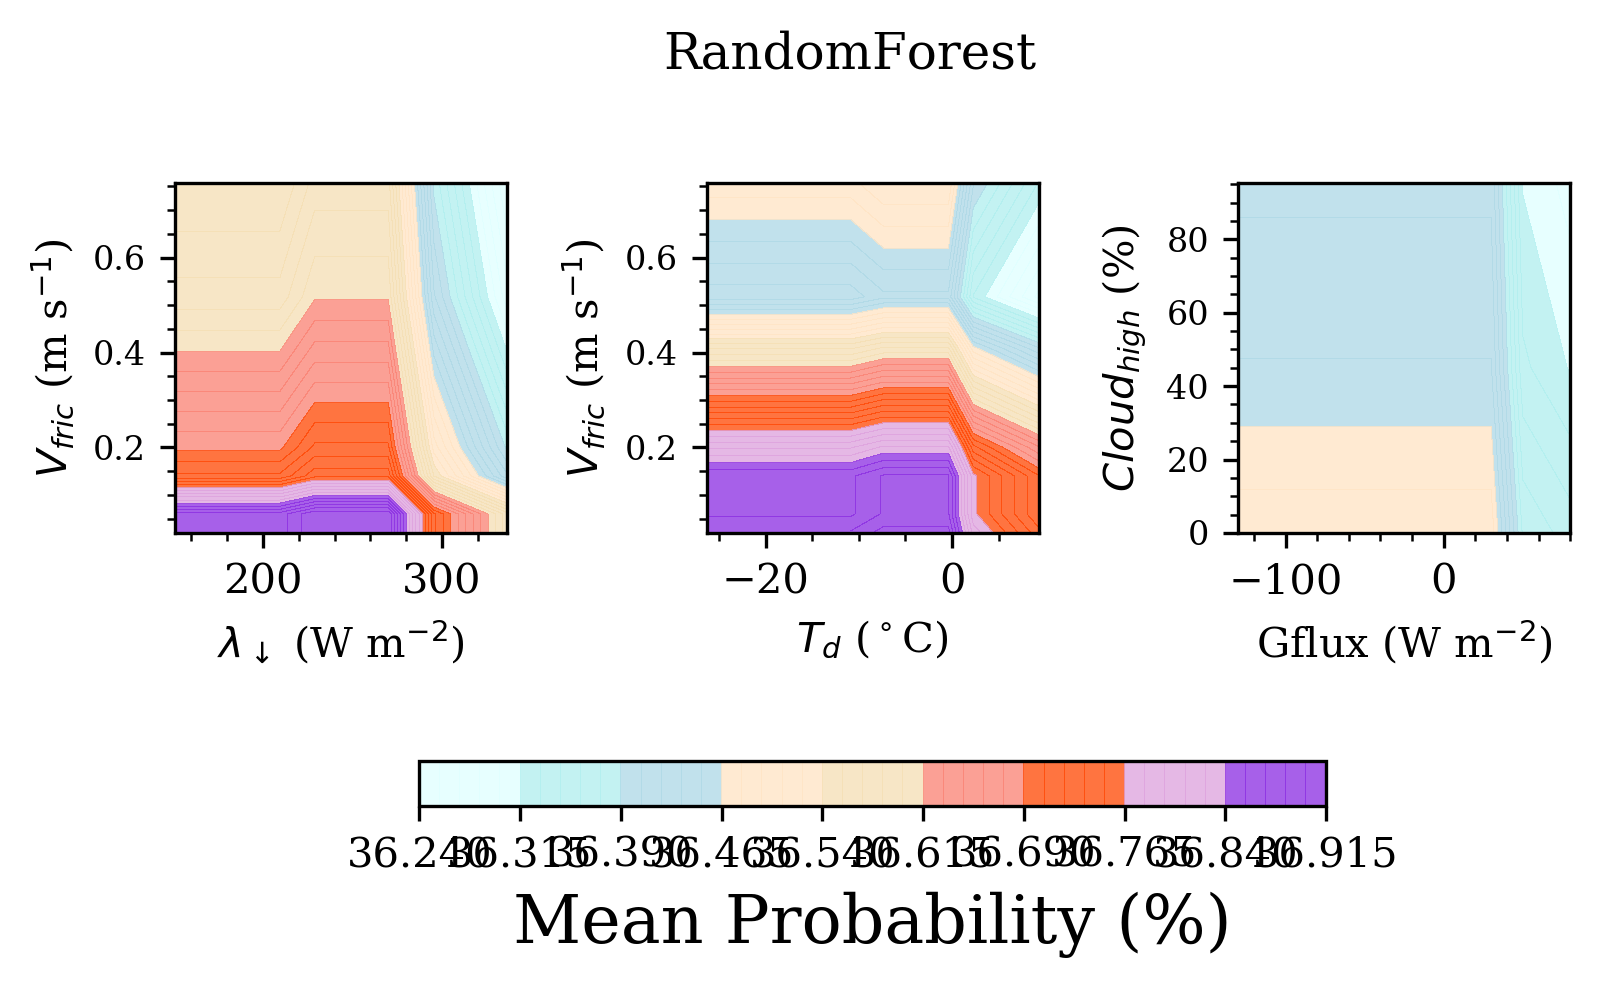

In [6]:
feature_tuple = [('dllwave_flux', 'fric_vel'), ('dwpt2m', 'fric_vel'), ('gflux', 'high_cloud')]
myInterpreter.run_pd(features=feature_tuple, nbootstrap=1, subsample=1.0, njobs=3)
fig, axes = myInterpreter.plot_pd(feature_units=feature_units,
                                readable_feature_names=readable_feature_names)

Models for ALE: ['RandomForestClassifier']
Using 3 processors...
-0.7407407407407417 0.7407407407407417


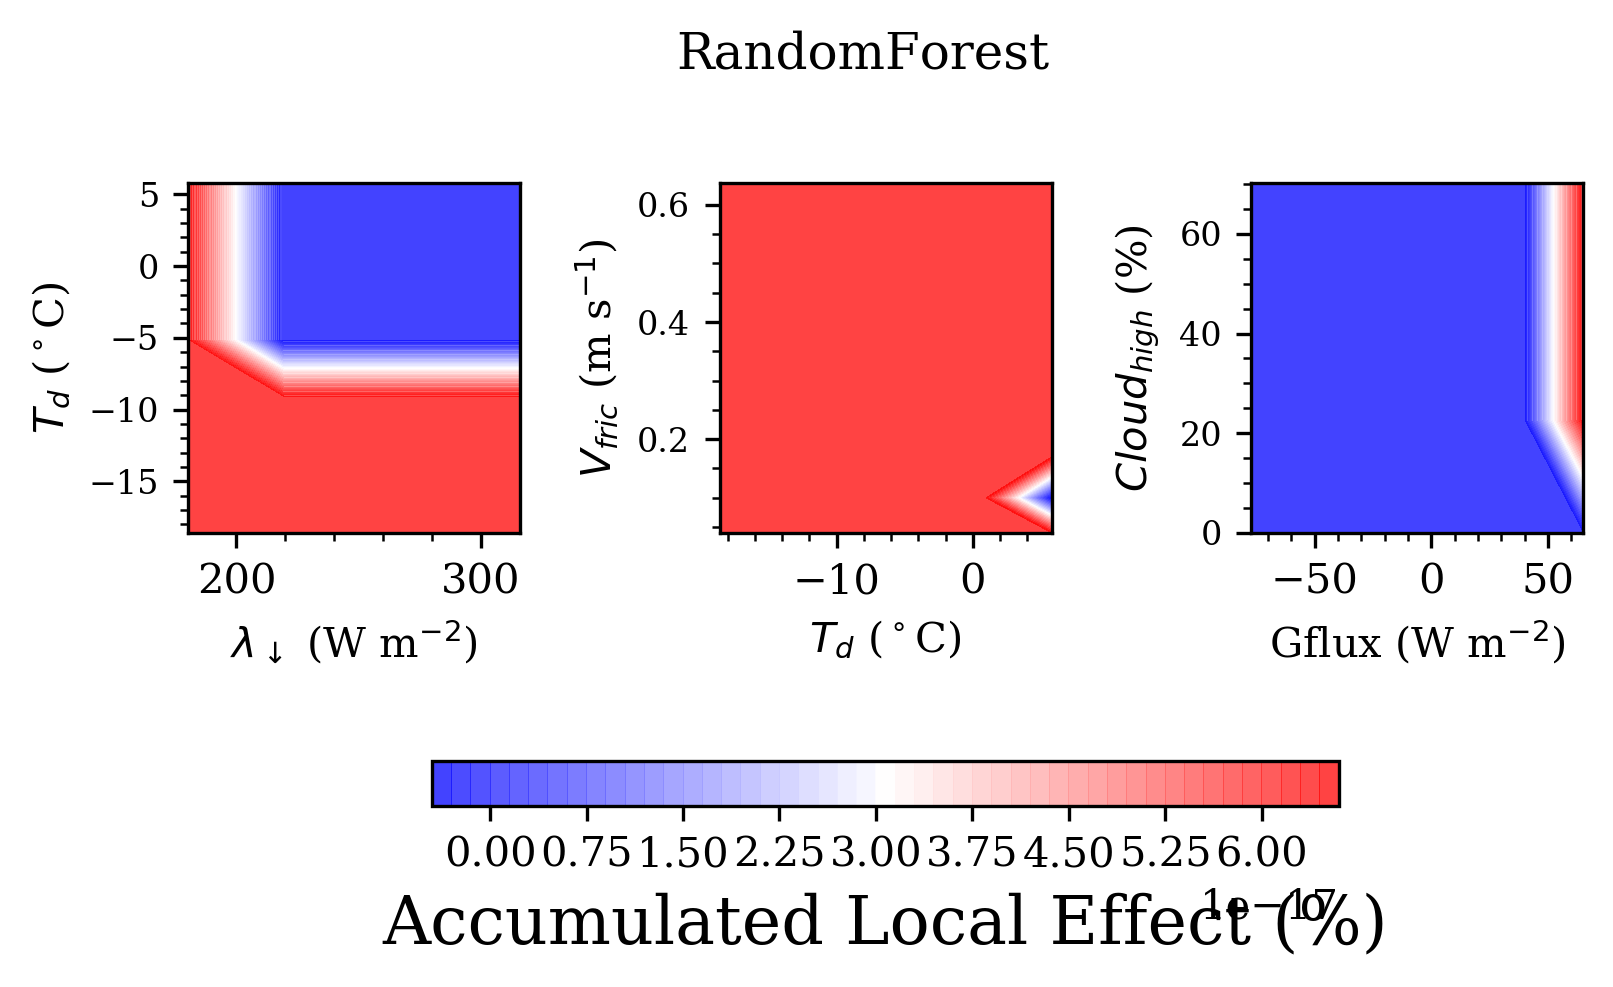

In [15]:
feature_tuple = [('dllwave_flux', 'dwpt2m'),('dwpt2m', 'fric_vel'), ('gflux', 'high_cloud')]
myInterpreter.run_ale(features=feature_tuple, nbootstrap=1, subsample=1.0, njobs=3)
fig, axes = myInterpreter.plot_ale(feature_units=feature_units,
                                 readable_feature_names=readable_feature_names)